# Preparación del ambiente

In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.neural_network import MLPRegressor


In [2]:
catalogo_paises = pd.read_csv('catalogos/tc_pais_destino.csv')
diccionario_paises = dict(zip(catalogo_paises['ID_PAIS_DESTINO'], catalogo_paises['DESC_PAIS_DESTINO']))

In [3]:
folder_path = 'conjunto_de_datos//'
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
df_total = pd.concat([pd.read_csv(os.path.join(folder_path, file)) for file in csv_files], ignore_index=True)
df_total.head()

print(f"Se importaron {len(csv_files)} archivos y el DataFrame resultante tiene {df_total.shape[0]} filas.")


Se importaron 21 archivos y el DataFrame resultante tiene 165180 filas.


In [4]:
df_total

,PROD_EST,COBERTURA,ANIO,ID_MES,MARCA,MODELO,TIPO,SEGMENTO,ID_PAIS_DESTINO,UNI_VEH
0,Registro Administrativo de la Industria Automo...,Nacional,2005,1,Chrysler,PT Cruiser,Automóviles,Compactos,4,2186
1,Registro Administrativo de la Industria Automo...,Nacional,2005,1,Chrysler,PT Cruiser,Automóviles,Compactos,40,86
2,Registro Administrativo de la Industria Automo...,Nacional,2005,1,Chrysler,PT Cruiser,Automóviles,Compactos,66,4904
3,Registro Administrativo de la Industria Automo...,Nacional,2005,1,Chrysler,RAM 1500-,Camiones ligeros,Pick Ups,40,21
4,Registro Administrativo de la Industria Automo...,Nacional,2005,1,Chrysler,RAM 1500-,Camiones ligeros,Pick Ups,66,513
...,...,...,...,...,...,...,...,...,...,...
165175,Registro Administrativo de la Industria Automo...,Nacional,2025,4,Volkswagen,Tiguan-,Camiones ligeros,SUV's,175,0
165176,Registro Administrativo de la Industria Automo...,Nacional,2025,4,Volkswagen,Tiguan-,Camiones ligeros,SUV's,187,38
165177,Registro Administrativo de la Industria Automo...,Nacional,2025,4,Volkswagen,Tiguan-,Camiones ligeros,SUV's,219,0
165178,Registro Administrativo de la Industria Automo...,Nacional,2025,4,Volkswagen,Tiguan-,Camiones ligeros,SUV's,224,0


# Analisis de datos

## Analisis Descriptivo

Metricas estadísticas de los datos

In [5]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165180 entries, 0 to 165179
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   PROD_EST         165180 non-null  object
 1   COBERTURA        165180 non-null  object
 2   ANIO             165180 non-null  int64 
 3   ID_MES           165180 non-null  int64 
 4   MARCA            165180 non-null  object
 5   MODELO           165180 non-null  object
 6   TIPO             165180 non-null  object
 7   SEGMENTO         165180 non-null  object
 8   ID_PAIS_DESTINO  165180 non-null  int64 
 9   UNI_VEH          165180 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 12.6+ MB


In [6]:
df_total.describe()

,ANIO,ID_MES,ID_PAIS_DESTINO,UNI_VEH
count,165180.000000,165180.000000,165180.000000,165180.000000
mean,2018.311212,6.505285,121.745514,304.722297
std,4.999798,3.487291,164.931914,1599.094535
min,2005.000000,1.000000,3.000000,-3228.000000
25%,2015.000000,3.000000,42.000000,0.000000
50%,2020.000000,7.000000,66.000000,0.000000
75%,2022.000000,10.000000,172.000000,17.000000
max,2025.000000,12.000000,999.000000,39281.000000


## Tratamiento de Nulos

In [7]:
# Conteo de valores nulos por columna
nulos = df_total.isnull().sum()
print("Conteo de valores nulos por columna:")
print(nulos)

# Estadísticas descriptivas generales
print("\nEstadísticas descriptivas generales:")
print(df_total.describe())

# Media de cada columna numérica
media = df_total.mean(numeric_only=True)
print("\nMedia de cada columna numérica:")
print(media)

# Mediana de cada columna numérica
mediana = df_total.median(numeric_only=True)
print("\nMediana de cada columna numérica:")
print(mediana)

# Moda de cada columna
moda = df_total.mode().iloc[0]
print("\nModa de cada columna:")
print(moda)

Conteo de valores nulos por columna:
PROD_EST           0
COBERTURA          0
ANIO               0
ID_MES             0
MARCA              0
MODELO             0
TIPO               0
SEGMENTO           0
ID_PAIS_DESTINO    0
UNI_VEH            0
dtype: int64

Estadísticas descriptivas generales:
                ANIO         ID_MES  ID_PAIS_DESTINO        UNI_VEH
count  165180.000000  165180.000000    165180.000000  165180.000000
mean     2018.311212       6.505285       121.745514     304.722297
std         4.999798       3.487291       164.931914    1599.094535
min      2005.000000       1.000000         3.000000   -3228.000000
25%      2015.000000       3.000000        42.000000       0.000000
50%      2020.000000       7.000000        66.000000       0.000000
75%      2022.000000      10.000000       172.000000      17.000000
max      2025.000000      12.000000       999.000000   39281.000000

Media de cada columna numérica:
ANIO               2018.311212
ID_MES                6.50

No se encontro ningún nulo por lo que este paso esta completo


## Verificación de Consistencia

Si bien la fuente es confiable e incluso maneja un diccionario de datos, vamos a verificar que los datos se apeguen a lo descrito en la documentación

### ID_PAIS_DESTINO

Se verifica que todos los ID de paises esten contenidos en el catalogo

In [8]:
valores_unicos = set(df_total['ID_PAIS_DESTINO'].unique())
claves_diccionario = set(diccionario_paises.keys())

valores_faltantes = valores_unicos - claves_diccionario

if valores_faltantes:
    print(f"Los siguientes valores de ID_PAIS_DESTINO no están en el diccionario: {valores_faltantes}")
else:
    print("Todos los valores únicos de ID_PAIS_DESTINO están contenidos en el catalogo.")

Todos los valores únicos de ID_PAIS_DESTINO están contenidos en el catalogo.


### UNI_VEH

Verificamos si hay registros menores a 0

In [9]:
registros_negativos = df_total[df_total['UNI_VEH'] < 0]
print(f"Se encontraron {len(registros_negativos)} registros con UNI_VEH negativos.")
print(f"Procentaje de registros negativos: {len(registros_negativos) / len(df_total) * 100:.2f}%")

Se encontraron 140 registros con UNI_VEH negativos.
Procentaje de registros negativos: 0.08%


### ANIO

Verificamos que los valores unicos de ANIO coincidan con los esperados (1-12)

In [10]:
valores_unicos_anio = df_total['ANIO'].unique()
print("Valores únicos de ANIO:")
sorted(valores_unicos_anio)

Valores únicos de ANIO:


[np.int64(2005),
 np.int64(2006),
 np.int64(2007),
 np.int64(2008),
 np.int64(2009),
 np.int64(2010),
 np.int64(2011),
 np.int64(2012),
 np.int64(2013),
 np.int64(2014),
 np.int64(2015),
 np.int64(2016),
 np.int64(2017),
 np.int64(2018),
 np.int64(2019),
 np.int64(2020),
 np.int64(2021),
 np.int64(2022),
 np.int64(2023),
 np.int64(2024),
 np.int64(2025)]

# Limpieza de Datos


Con el analisís estadístico vimos que existen valores negativos en la columna UNI_VEH, el diccionario de datos especifica que el campo UNI_VEH tiene un rango mayor a 0, por lo que los datos que contengan números negativos se consideraran erroneos

Al representar solo el 0.08% de los datos totales hemos decicido prescindir de estos datos y eliminarlos para mantener la consistencia en el analisís.

In [11]:
print(f"Núero de filas antes del borrado :",df_total.shape[0])
df_clean = df_total[df_total['UNI_VEH'] >= 0].copy()
print(f"El DataFrame ahora tiene {df_clean.shape[0]} filas.")

Núero de filas antes del borrado : 165180
El DataFrame ahora tiene 165040 filas.


In [12]:
df_clean.reset_index(drop=True, inplace=True)
df_clean

,PROD_EST,COBERTURA,ANIO,ID_MES,MARCA,MODELO,TIPO,SEGMENTO,ID_PAIS_DESTINO,UNI_VEH
0,Registro Administrativo de la Industria Automo...,Nacional,2005,1,Chrysler,PT Cruiser,Automóviles,Compactos,4,2186
1,Registro Administrativo de la Industria Automo...,Nacional,2005,1,Chrysler,PT Cruiser,Automóviles,Compactos,40,86
2,Registro Administrativo de la Industria Automo...,Nacional,2005,1,Chrysler,PT Cruiser,Automóviles,Compactos,66,4904
3,Registro Administrativo de la Industria Automo...,Nacional,2005,1,Chrysler,RAM 1500-,Camiones ligeros,Pick Ups,40,21
4,Registro Administrativo de la Industria Automo...,Nacional,2005,1,Chrysler,RAM 1500-,Camiones ligeros,Pick Ups,66,513
...,...,...,...,...,...,...,...,...,...,...
165035,Registro Administrativo de la Industria Automo...,Nacional,2025,4,Volkswagen,Tiguan-,Camiones ligeros,SUV's,175,0
165036,Registro Administrativo de la Industria Automo...,Nacional,2025,4,Volkswagen,Tiguan-,Camiones ligeros,SUV's,187,38
165037,Registro Administrativo de la Industria Automo...,Nacional,2025,4,Volkswagen,Tiguan-,Camiones ligeros,SUV's,219,0
165038,Registro Administrativo de la Industria Automo...,Nacional,2025,4,Volkswagen,Tiguan-,Camiones ligeros,SUV's,224,0


Aqui aplicamos el modelo estrella volcando las columnas categoricas en tablas y sustituyendo sus valores por un id

In [13]:
df = df_clean.copy()
tabla_marca = df[['MARCA']].drop_duplicates().copy()
tabla_marca['id_MARCA'] = range(1,len(tabla_marca)+1)
tabla_marca = tabla_marca.iloc[:,[1,0]].reset_index(drop=True)
tabla_modelo = df[['MODELO']].drop_duplicates().copy()
tabla_modelo['id_MODELO'] = range(1,len(tabla_modelo)+1)
tabla_modelo = tabla_modelo.iloc[:,[1,0]].reset_index(drop=True)
tabla_tipo = df[['TIPO']].drop_duplicates().copy()
tabla_tipo['id_TIPO'] = range(1,len(tabla_tipo)+1)
tabla_tipo = tabla_tipo.iloc[:,[1,0]].reset_index(drop=True)
tabla_segmento = df[['SEGMENTO']].drop_duplicates().copy()
tabla_segmento['id_SEGMENTO'] = range(1,len(tabla_segmento)+1)
tabla_segmento = tabla_segmento.iloc[:,[1,0]].reset_index(drop=True)
df = df.merge(tabla_marca, on = 'MARCA', how = 'left')
df = df.merge(tabla_modelo, on = 'MODELO',how = 'left')
df = df.merge(tabla_tipo, on = 'TIPO', how = 'left')
df = df.merge(tabla_segmento, on = 'SEGMENTO',how = 'left')
df.drop(columns=['MARCA', 'MODELO', 'TIPO', 'SEGMENTO', 'COBERTURA','PROD_EST'], inplace=True)

In [14]:
df

,ANIO,ID_MES,ID_PAIS_DESTINO,UNI_VEH,id_MARCA,id_MODELO,id_TIPO,id_SEGMENTO
0,2005,1,4,2186,1,1,1,1
1,2005,1,40,86,1,1,1,1
2,2005,1,66,4904,1,1,1,1
3,2005,1,40,21,1,2,2,2
4,2005,1,66,513,1,2,2,2
...,...,...,...,...,...,...,...,...
165035,2025,4,175,0,7,86,2,3
165036,2025,4,187,38,7,86,2,3
165037,2025,4,219,0,7,86,2,3
165038,2025,4,224,0,7,86,2,3


### Matriz de correlación

Vemos que tenemos una buena independecia de los datos exceptuando claramente por MODELO-MARCA ya que es evidente que sabiendo el modelo se puede saber la marca del vehiculo.

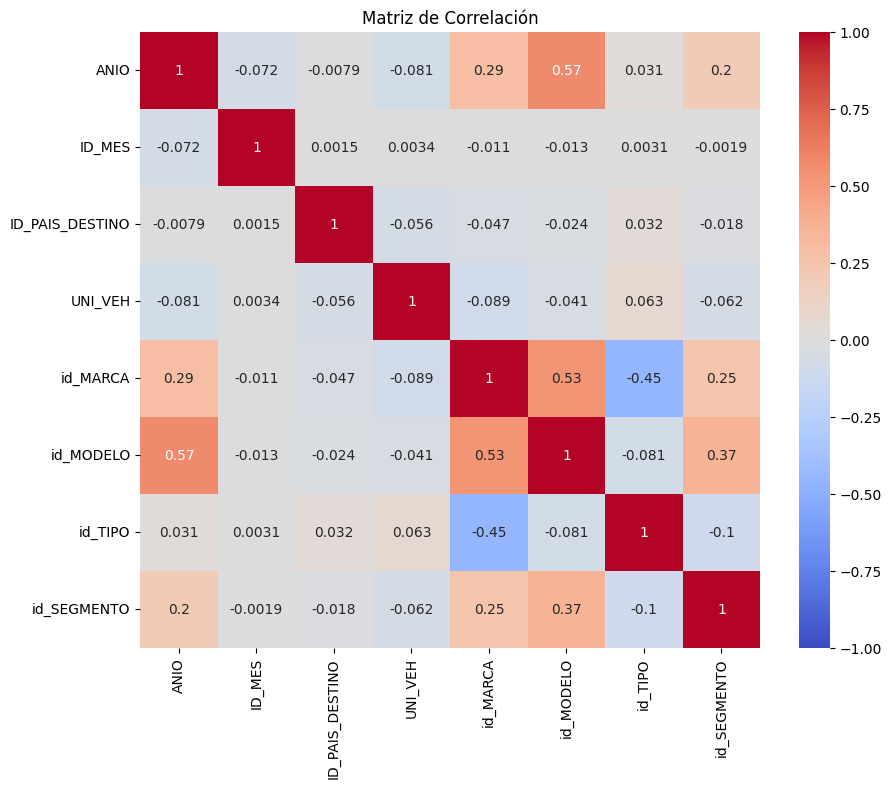

In [15]:
corr_matriz = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matriz, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

### Componentes principales (PCA)

Varianza explicada por cada componente: [0.27997355 0.14920093 0.13187551]


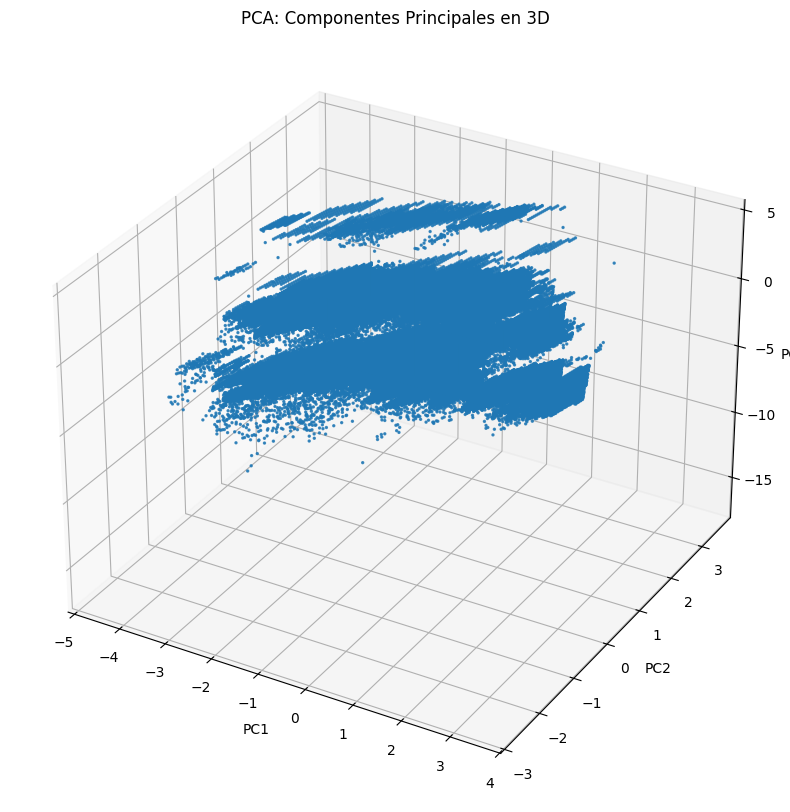

In [24]:
df_scaler = df.copy()

scaler = StandardScaler()
# Ensure only numeric columns are scaled
numeric_columns = df_scaler.select_dtypes(include=['number']).columns
scaled_data = scaler.fit_transform(df_scaler[numeric_columns])
pca = PCA(n_components=3)  # Reducir a 3 componentes principales
pca_data = pca.fit_transform(scaled_data)
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
pca_df = pd.DataFrame(data=pca_data, columns=['p1', 'p2', 'p3'])


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df.p1, pca_df.p2, pca_df.p3, alpha=0.8, s=2)
ax.set_title('PCA: Componentes Principales en 3D')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

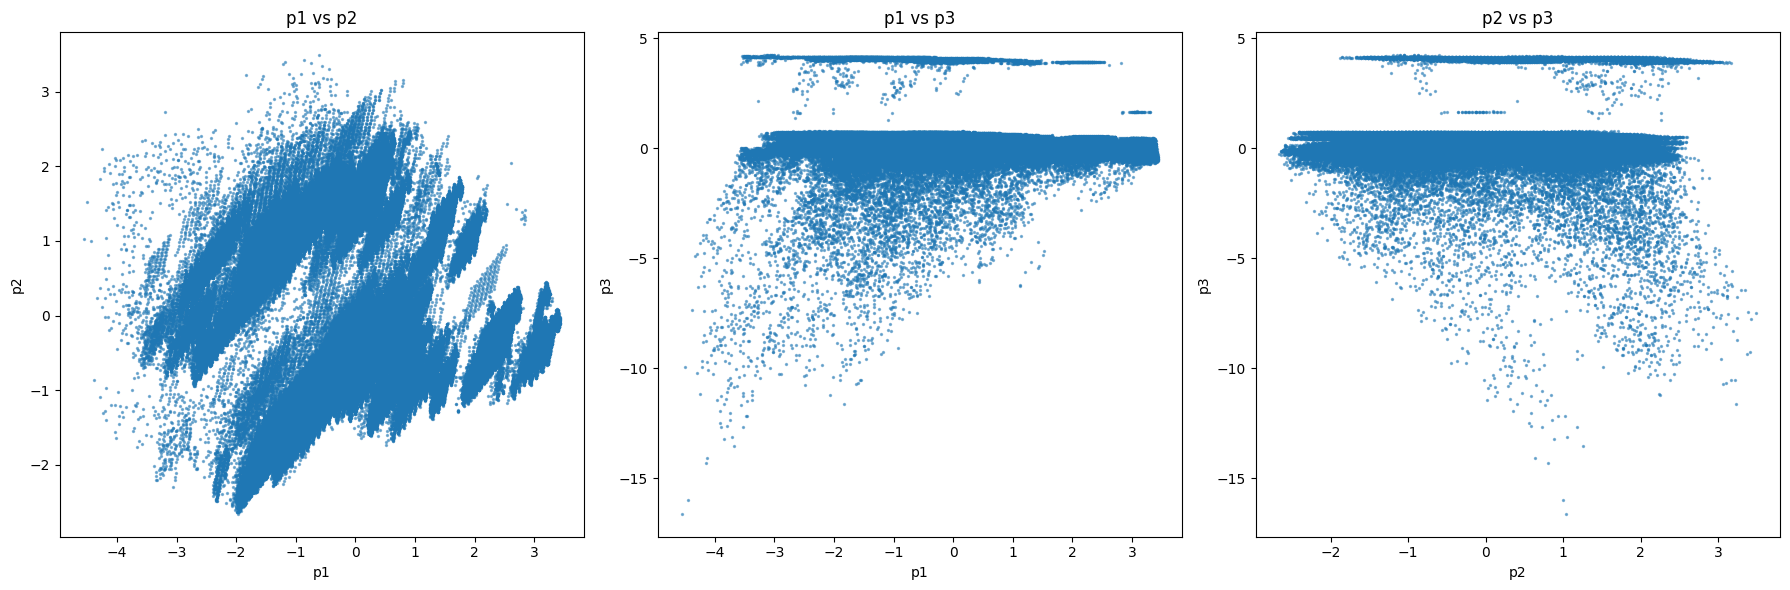

In [26]:
# Graficar combinaciones de las variables p1, p2 y p3
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de p1 vs p2
axes[0].scatter(pca_df['p1'], pca_df['p2'], alpha=0.5, s=2)
axes[0].set_title('p1 vs p2')
axes[0].set_xlabel('p1')
axes[0].set_ylabel('p2')

# Gráfico de p1 vs p3
axes[1].scatter(pca_df['p1'], pca_df['p3'], alpha=0.5, s=2)
axes[1].set_title('p1 vs p3')
axes[1].set_xlabel('p1')
axes[1].set_ylabel('p3')

# Gráfico de p2 vs p3
axes[2].scatter(pca_df['p2'], pca_df['p3'], alpha=0.5, s=2)
axes[2].set_title('p2 vs p3')
axes[2].set_xlabel('p2')
axes[2].set_ylabel('p3')

plt.tight_layout()
plt.show()

### Histogramas de columnas categoricas

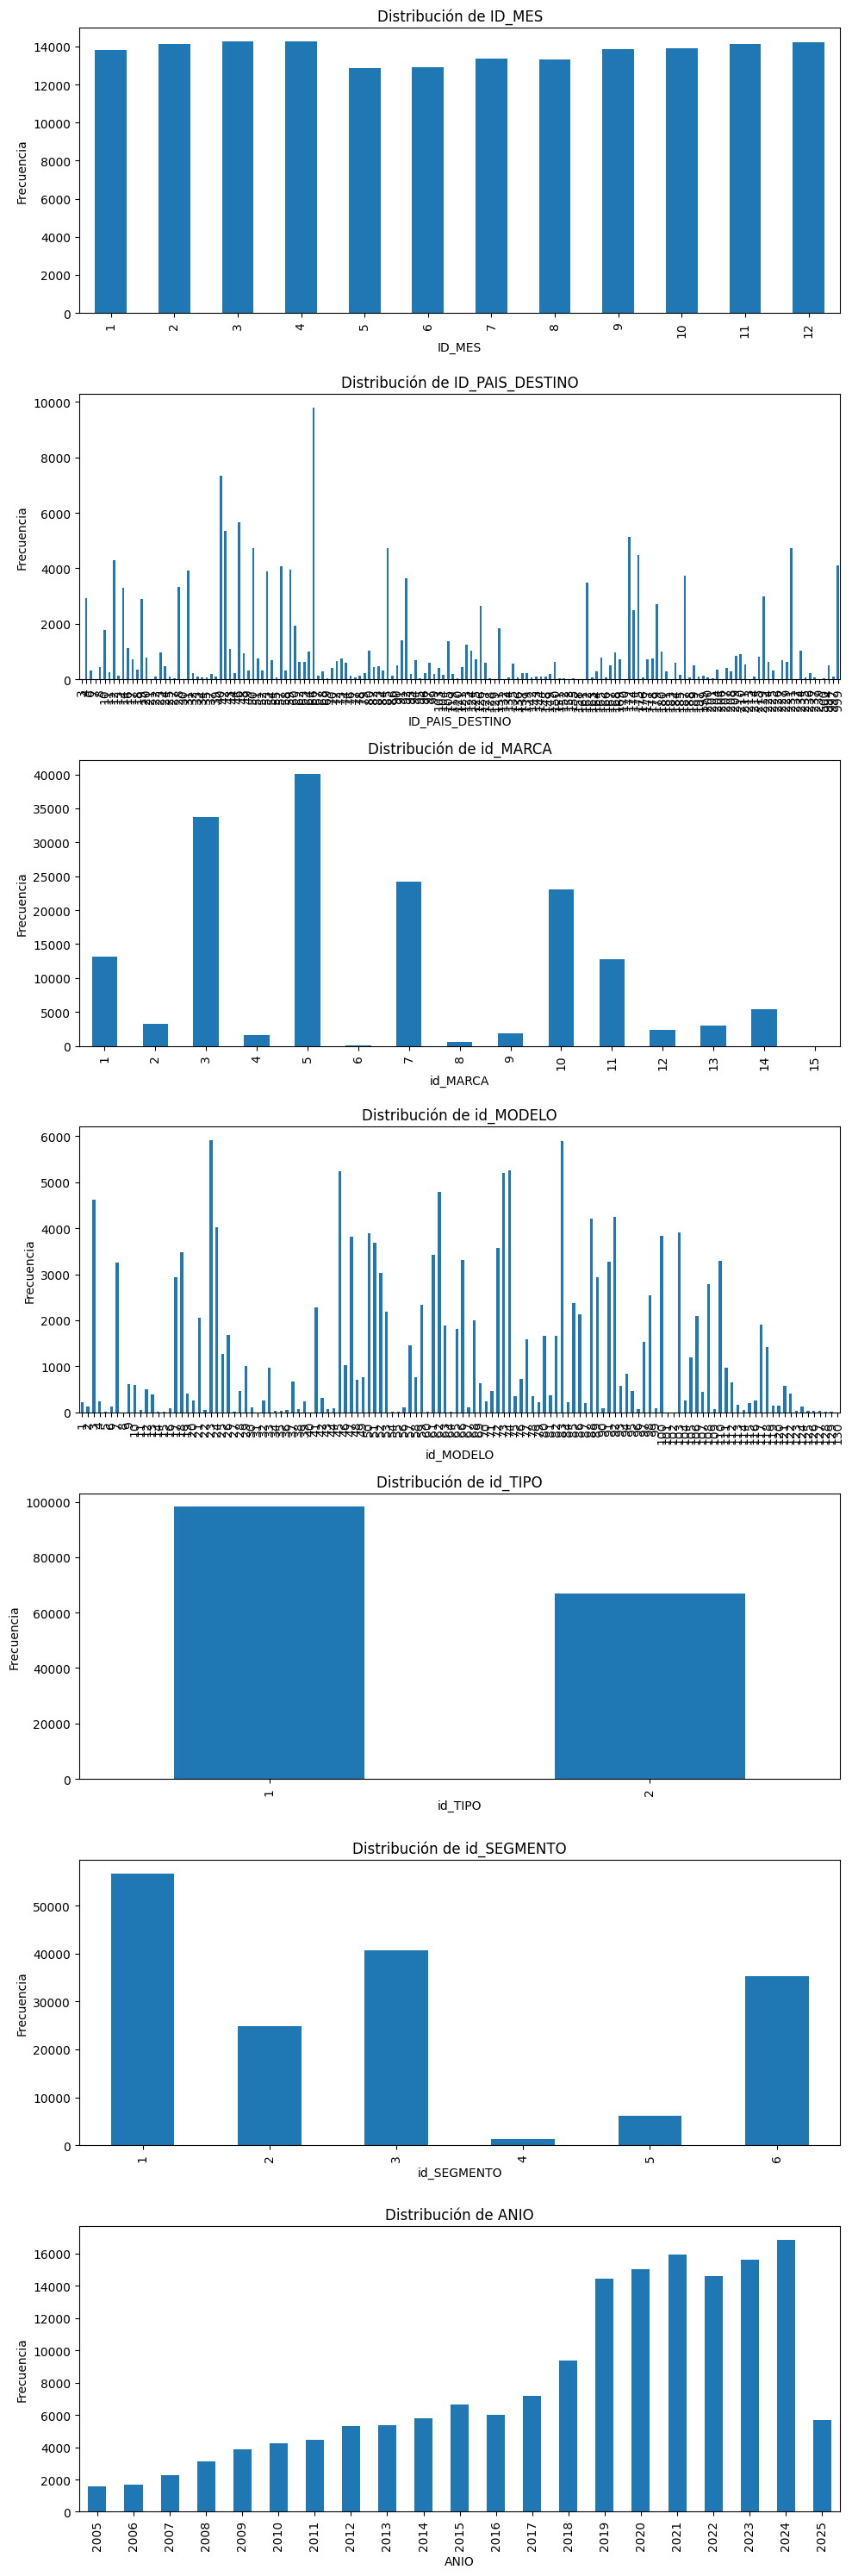

In [27]:
columns_to_plot = ['ID_MES', 'ID_PAIS_DESTINO', 'id_MARCA', 'id_MODELO', 'id_TIPO', 'id_SEGMENTO', 'ANIO']

fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, 30))

for i, column in enumerate(columns_to_plot):
    df[column].value_counts().sort_index().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribución de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### Graficos de caja

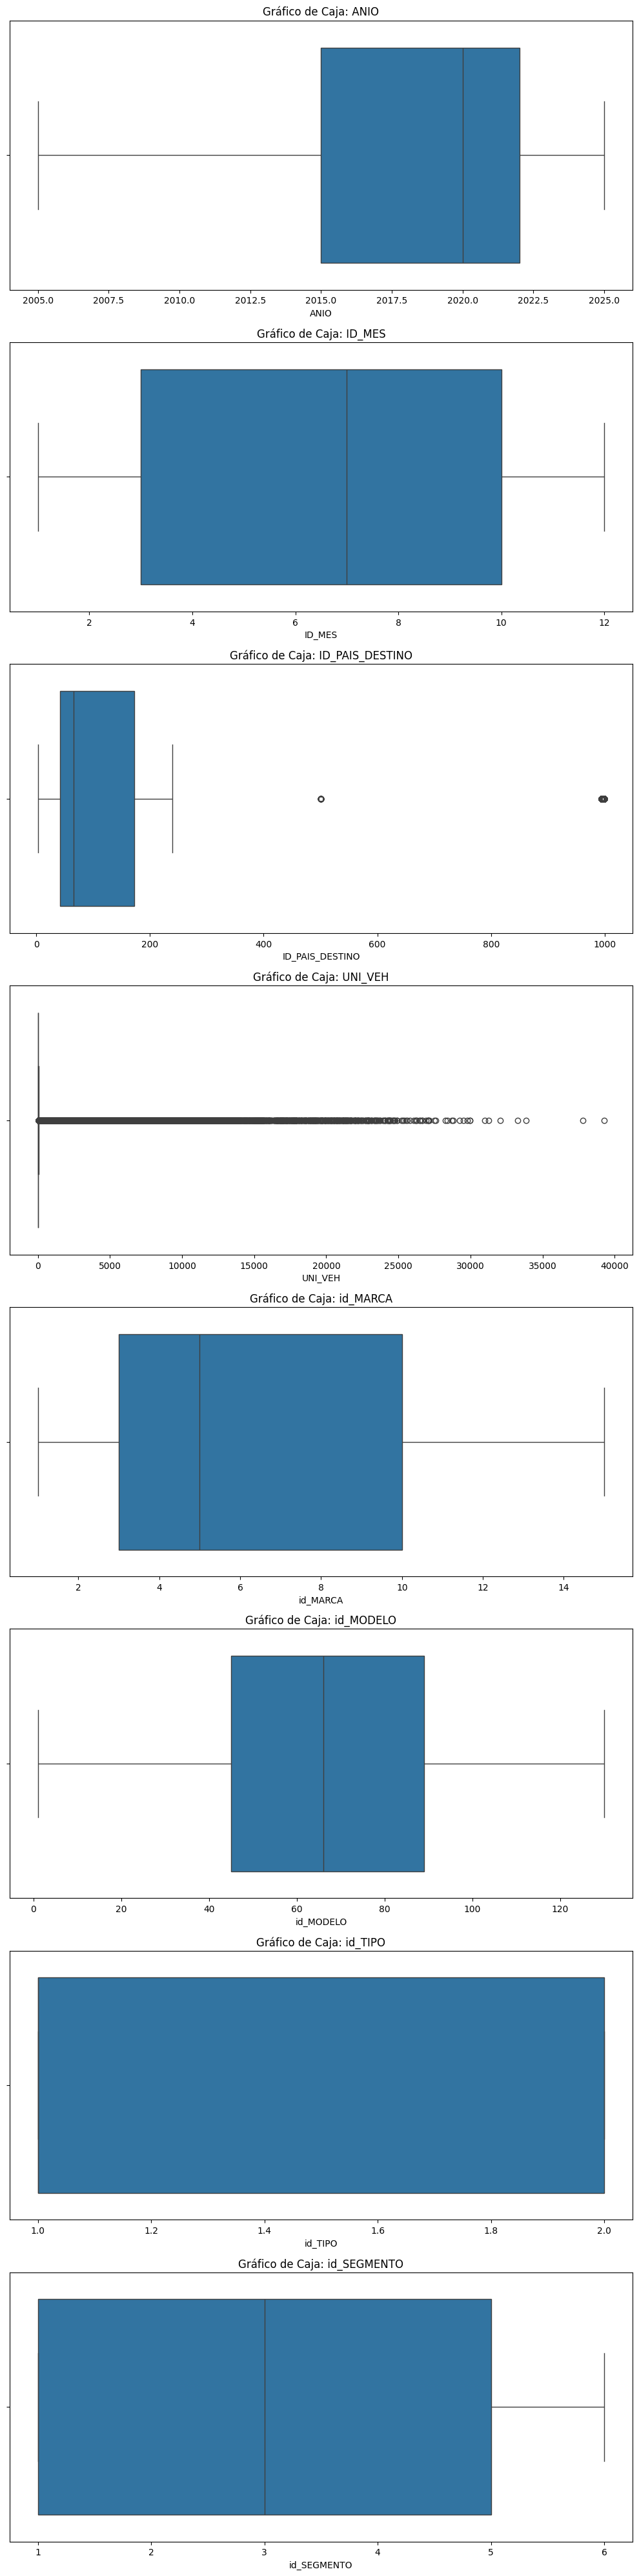

In [28]:
# Crear gráficos de caja para las columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns

fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 5 * len(numeric_columns)))

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Gráfico de Caja: {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

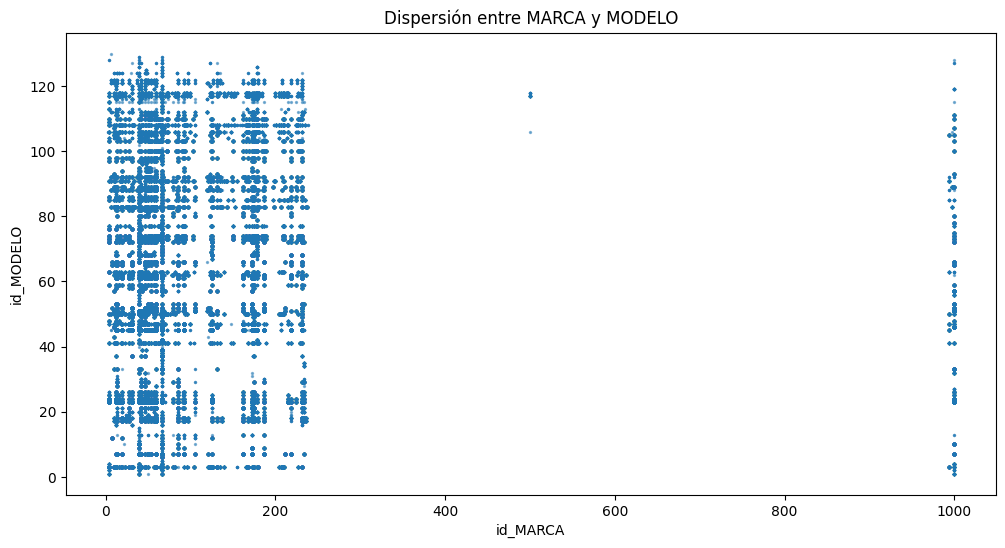

In [36]:
# Para graficar la dispersión entre MARCA y MODELO, usamos los IDs numéricos para evitar problemas con etiquetas de texto.
plt.figure(figsize=(12, 6))
plt.scatter(df['ID_PAIS_DESTINO'], df['id_MODELO'], alpha=0.5, s=2)
plt.title('Dispersión entre MARCA y MODELO')
plt.xlabel('id_MARCA')
plt.ylabel('id_MODELO')
plt.show()

# Modelado

En la siguiente celda separaremos los datos del 2025, estos los usaremos como datos de prueba para el modelo.

In [16]:

df_test = df[df['ANIO'] == 2025].copy()
df = df[df['ANIO'] != 2025].copy()
# Crear una columna de fecha para ordenar los datos
df_test['FECHA'] = pd.to_datetime(df_test['ANIO'].astype(str) + '-' + df_test['ID_MES'].astype(str) + '-01')

# Ordenar por fecha
df_test = df_test.sort_values('FECHA')


# Crear variables de rezago (lag features) para UNI_VEH
df_test['UNI_VEH_LAG1'] = df_test['UNI_VEH'].shift(1)
df_test['UNI_VEH_LAG2'] = df_test['UNI_VEH'].shift(2)
df_test['UNI_VEH_LAG3'] = df_test['UNI_VEH'].shift(3)


# Eliminar filas con NaN generadas por el shift
df_test = df_test.dropna().copy()


### PRF

Ahora teniendo solo los datos del 2024 y anteriores vamos a entrenar el modelo de Prediction Random Forest

In [ ]:
# Crear una columna de fecha para ordenar los datos
df['FECHA'] = pd.to_datetime(df['ANIO'].astype(str) + '-' + df['ID_MES'].astype(str) + '-01')

# Ordenar por fecha
df = df.sort_values('FECHA')

# Crear variables de rezago (lag features) para UNI_VEH
df['UNI_VEH_LAG1'] = df['UNI_VEH'].shift(1)
df['UNI_VEH_LAG2'] = df['UNI_VEH'].shift(2)
df['UNI_VEH_LAG3'] = df['UNI_VEH'].shift(3)

# Eliminar filas con NaN generadas por el shift
df_ml = df.dropna().copy()

# Seleccionar variables predictoras (puedes agregar más si lo deseas)
features = ['ANIO', 'ID_MES', 'ID_PAIS_DESTINO', 'id_MARCA', 'id_MODELO', 'id_TIPO', 'id_SEGMENTO', 
            'UNI_VEH_LAG1', 'UNI_VEH_LAG2', 'UNI_VEH_LAG3']
X = df_ml[features]
y = df_ml['UNI_VEH']

# Separar en entrenamiento y prueba (por tiempo, no aleatorio)
split_index = int(len(df_ml) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


# Entrenar modelo
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest con variables de tiempo:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

mrse = np.sqrt(mean_squared_error(y_test, y_pred))
print("MRSE:", mrse)

# Evitar división por 0 o valores muy pequeños
mask = y_test > 100  
mape_rf = np.mean(np.abs((y_test[mask] - y_pred[mask]) / y_test[mask])) * 100
print(f"MAPE ajustado (y > 100): {mape_rf:.2f}%")


Random Forest con variables de tiempo:
MSE: 366579.7395544008
R2: 0.8088895266001752
MRSE: 605.4582888642295
MAPE ajustado (y > 100): 56.53%


In [31]:
# Evitar división por 0 o valores muy pequeños
mask = y_test > 100  
mape_rf = np.mean(np.abs((y_test[mask] - y_pred[mask]) / y_test[mask])) * 100
print(f"MAPE ajustado (y > 100): {mape_rf:.2f}%")

MAPE ajustado (y > 100): 68.66%


Random Forest Regressor se comporta de manera correcta:
- R2: Explica el 80% del comportamiento real
- MRSE: El error medio en unidades vendidas es de 600

### Red Neuronal

In [18]:

# Normalizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir y entrenar la red neuronal
mlp = MLPRegressor(hidden_layer_sizes=(128,64, 32), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Predecir
y_pred_mlp = mlp.predict(X_test_scaled)


In [19]:
# Evaluar
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
print("Red Neuronal (MLPRegressor):")
print("MSE:", mse_mlp)
print("R2:", r2_mlp)
mrse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
print("MRSE:", mrse_mlp)

Red Neuronal (MLPRegressor):
MSE: 639934.1431571495
R2: 0.6663805883212897
MRSE: 799.9588384142959


Estas pruebas nos indican que las redes neuronales no son muy buenas para predecir ventas futuras a partir de datos del pasado, ya que:
- R2: Explica solo el 66% del comportamiento real
- MRSE: El error medio en unidades vendidas es de 1026

# Evaluación de resultados

In [20]:
# Eliminar filas con NaN generadas por el shift
df_test = df_test.dropna().copy()
# Seleccionar las mismas variables predictoras para df_test
X_test_future = df_test[features] 

# Escalar los datos para MLP
X_test_future_scaled = scaler.transform(X_test_future)

# Predicciones
df_test['RF_pred'] = rf.predict(X_test_future)
df_test['MLP_pred'] = mlp.predict(X_test_future_scaled)

df_test[['ANIO', 'ID_MES', 'ID_PAIS_DESTINO','UNI_VEH', 'RF_pred', 'MLP_pred']]

,ANIO,ID_MES,ID_PAIS_DESTINO,UNI_VEH,RF_pred,MLP_pred
160210,2025,1,54,0,5.07,-20.308628
160209,2025,1,53,0,0.00,-9.042901
160208,2025,1,51,0,0.00,6.944076
160207,2025,1,50,0,0.00,12.963258
160206,2025,1,46,81,34.09,84.045636
...,...,...,...,...,...,...
164032,2025,4,40,54,86.58,276.911624
164031,2025,4,14,0,0.12,104.418654
164030,2025,4,10,8,48.50,30.216687
164039,2025,4,10,5,10.23,-18.075454


In [32]:
# Cambiar valores negativos en MLP_pred por 0
df_test['MLP_pred'] = df_test['MLP_pred'].clip(lower=0)

# Calcular la precisión del modelo MLP respecto a UNI_VEH
precision_rango = (np.abs(df_test['MLP_pred'].round() - df_test['UNI_VEH']) <= 160).mean() * 100
print(f"Precisión del modelo MLP respecto a UNI_VEH (±160 unidades): {precision_rango:.2f}%")

# Cambiar valores negativos en RF_pred por 0
df_test['RF_pred'] = df_test['RF_pred'].clip(lower=0)

# Calcular la precisión del modelo RF respecto a UNI_VEH
precision_rf_rango = (np.abs(df_test['RF_pred'].round() - df_test['UNI_VEH']) <= 50).mean() * 100
print(f"Precisión del modelo Random Forest respecto a UNI_VEH (±150 unidades): {precision_rf_rango:.2f}%")

Precisión del modelo MLP respecto a UNI_VEH (±160 unidades): 79.92%
Precisión del modelo Random Forest respecto a UNI_VEH (±150 unidades): 80.84%


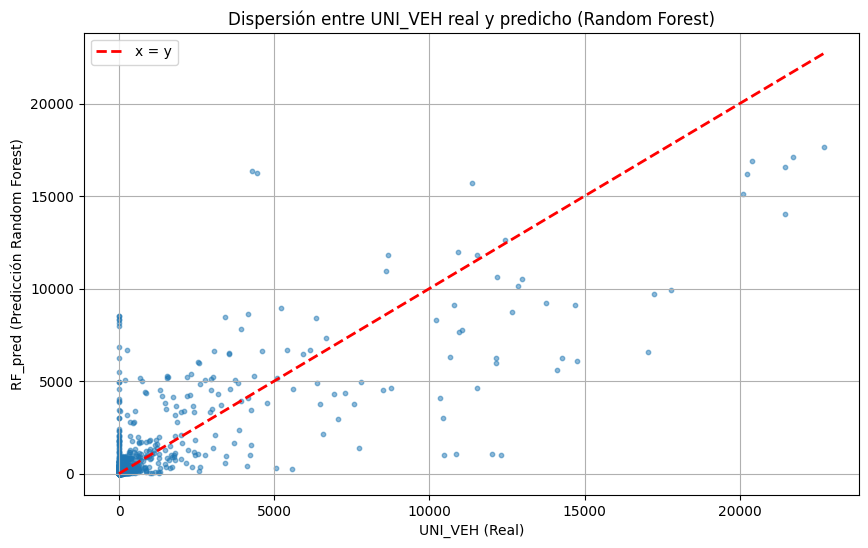

In [35]:

plt.figure(figsize=(10, 6))
plt.scatter(df_test['UNI_VEH'], df_test['RF_pred'], alpha=0.5, s=10)
plt.xlabel('UNI_VEH (Real)')
plt.ylabel('RF_pred (Predicción Random Forest)')
plt.title('Dispersión entre UNI_VEH real y predicho (Random Forest)')
plt.plot([df_test['UNI_VEH'].min(), df_test['UNI_VEH'].max()],
         [df_test['UNI_VEH'].min(), df_test['UNI_VEH'].max()],
         color='red', linestyle='--', linewidth=2, label='x = y')
plt.legend()

plt.grid(True)
plt.show()

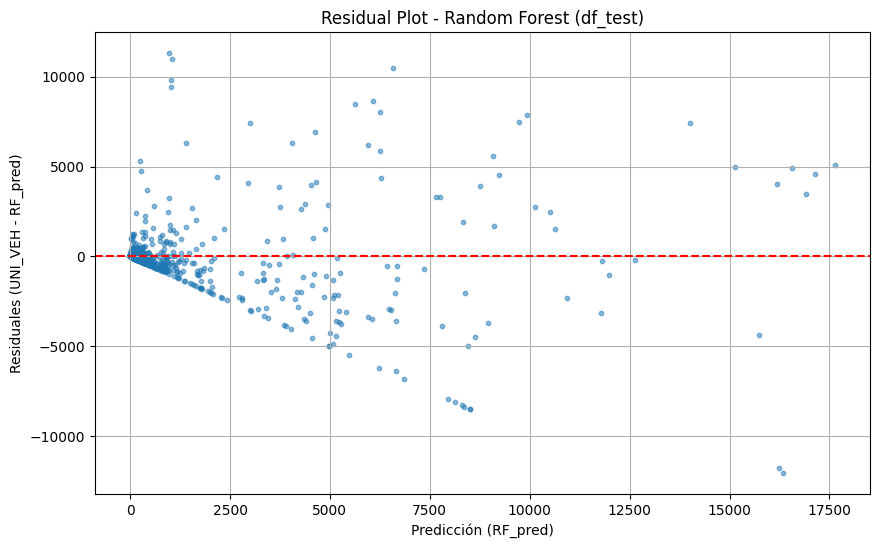

In [23]:
df_test
residuals_rf = df_test['UNI_VEH'] - df_test['RF_pred']

plt.figure(figsize=(10, 6))
plt.scatter(df_test['RF_pred'], residuals_rf, alpha=0.5, s=10)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicción (RF_pred)')
plt.ylabel('Residuales (UNI_VEH - RF_pred)')
plt.title('Residual Plot - Random Forest (df_test)')
plt.grid(True)
plt.show()

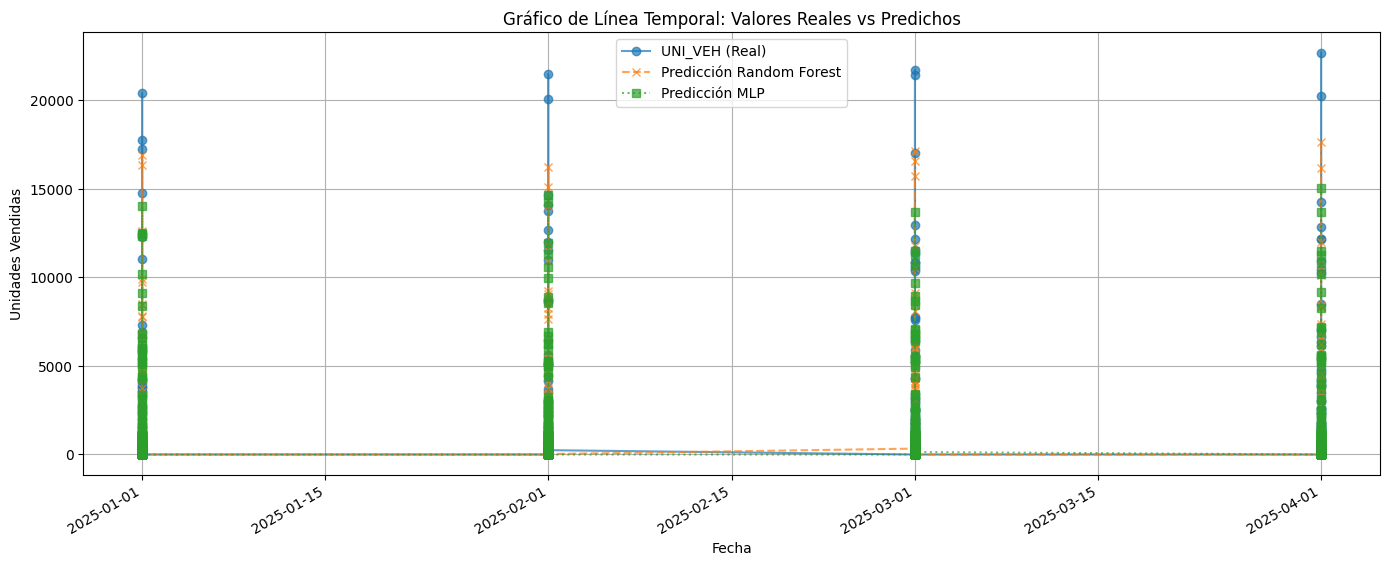

In [38]:
# Pivotear la tabla para obtener la suma mensual de UNI_VEH, RF_pred y MLP_pred
pivot = df_test.groupby('FECHA')[['UNI_VEH', 'RF_pred', 'MLP_pred']].sum().reset_index()
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df_test['FECHA'], df_test['UNI_VEH'], label='UNI_VEH (Real)', marker='o', linestyle='-', alpha=0.7)
ax.plot(df_test['FECHA'], df_test['RF_pred'], label='Predicción Random Forest', marker='x', linestyle='--', alpha=0.7)
ax.plot(df_test['FECHA'], df_test['MLP_pred'], label='Predicción MLP', marker='s', linestyle=':', alpha=0.7)
ax.set_xlabel('Fecha')
ax.set_ylabel('Unidades Vendidas')
ax.set_title('Gráfico de Línea Temporal: Valores Reales vs Predichos')
ax.legend()
ax.grid(True)
fig.tight_layout()
fig.autofmt_xdate()
plt.show()

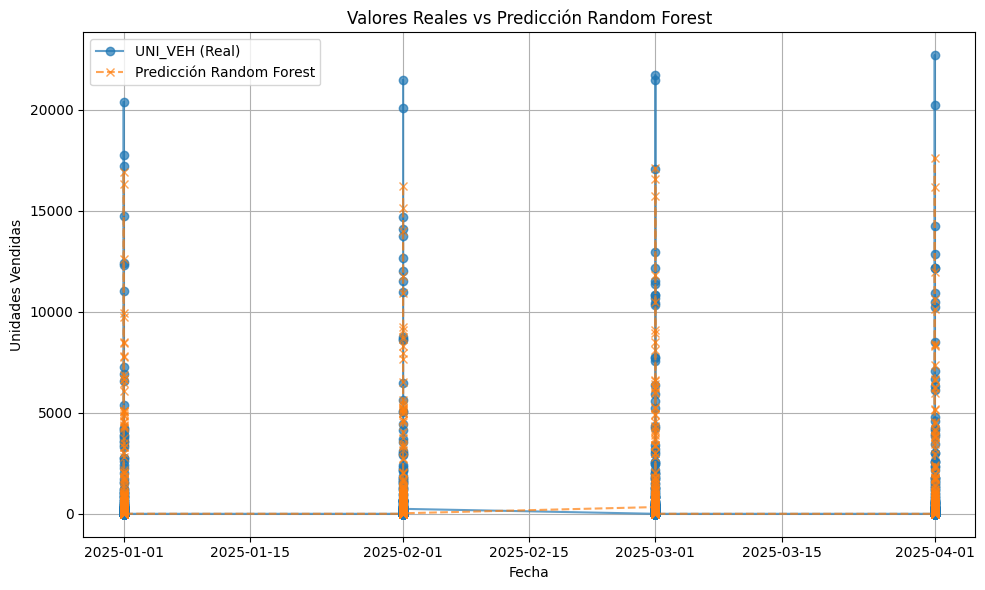

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(df_test['FECHA'], df_test['UNI_VEH'], label='UNI_VEH (Real)', marker='o', linestyle='-', alpha=0.7)
plt.plot(df_test['FECHA'], df_test['RF_pred'], label='Predicción Random Forest', marker='x', linestyle='--', alpha=0.7)
plt.xlabel('Fecha')
plt.ylabel('Unidades Vendidas')
plt.title('Valores Reales vs Predicción Random Forest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

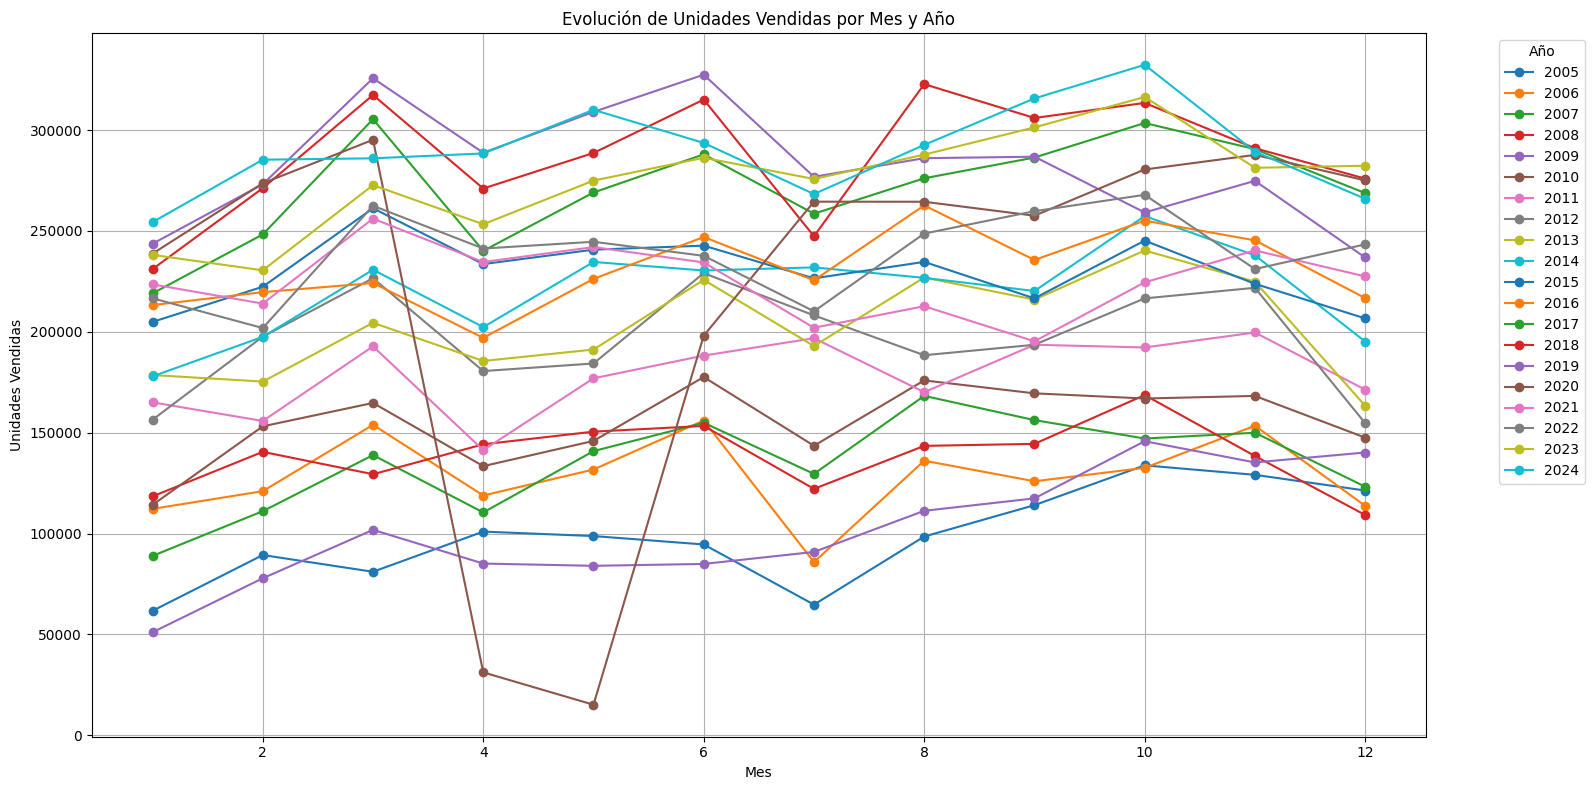

In [36]:
# Pivotear los años para que sean columnas y graficar la evolución de UNI_VEH por año y mes

pivot_df = df.groupby(['ANIO', 'ID_MES'])['UNI_VEH'].sum().reset_index()
pivot_table = pivot_df.pivot(index='ID_MES', columns='ANIO', values='UNI_VEH')

plt.figure(figsize=(16, 8))
pivot_table.plot(marker='o', ax=plt.gca())
plt.title('Evolución de Unidades Vendidas por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Unidades Vendidas')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

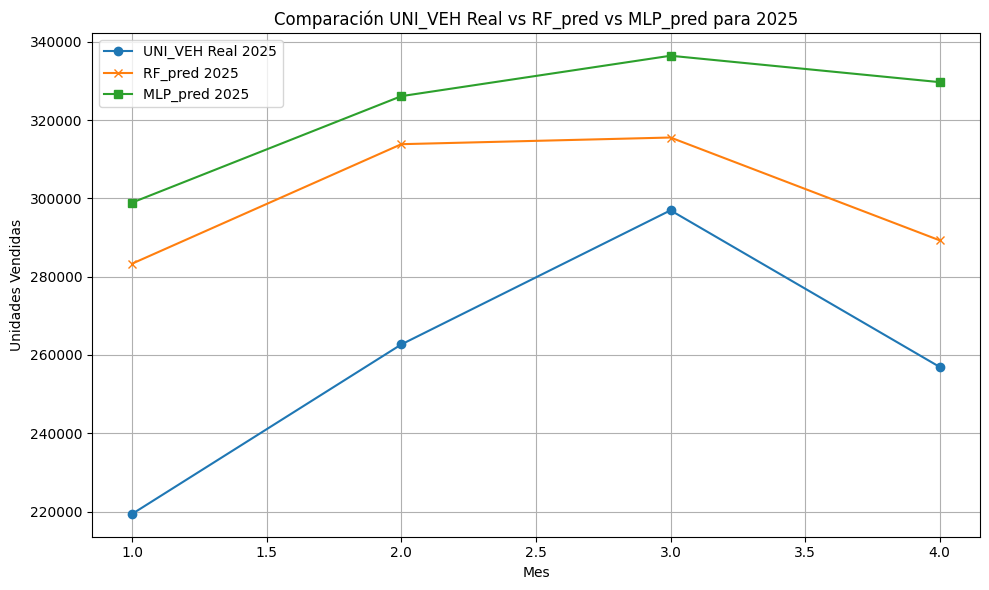

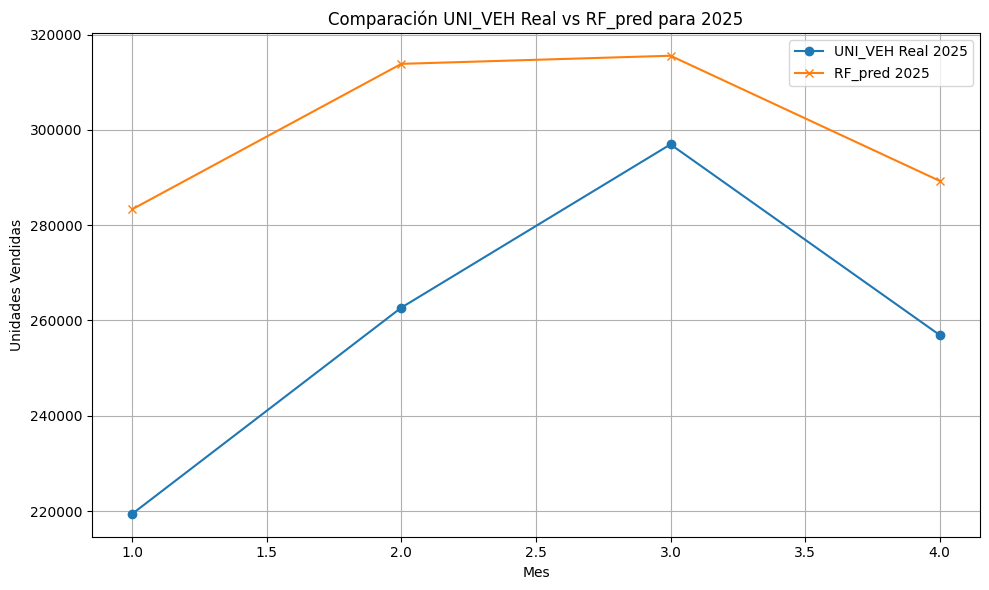

In [ ]:
# Crear tabla pivote para 2025: UNI_VEH real y predicción RF_pred y MLP_pred por mes
pivot_2025 = df_test.groupby('ID_MES').agg({'UNI_VEH': 'sum', 'RF_pred': 'sum', 'MLP_pred': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(pivot_2025['ID_MES'], pivot_2025['UNI_VEH'], marker='o', label='UNI_VEH Real 2025')
plt.plot(pivot_2025['ID_MES'], pivot_2025['RF_pred'], marker='x', label='RF_pred 2025')
plt.plot(pivot_2025['ID_MES'], pivot_2025['MLP_pred'], marker='s', label='MLP_pred 2025')
plt.xlabel('Mes')
plt.ylabel('Unidades Vendidas')
plt.title('Comparación UNI_VEH Real vs RF_pred vs MLP_pred para 2025')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Vemos que la predicción del modelo esta suficientemente bien ajustada y nos da un ajuste parecido a la tendencia real

# Exportación de modelos

In [39]:
import joblib

os.makedirs('modelos', exist_ok=True)
# Exportar modelos
joblib.dump(rf, 'modelo_random_forest.joblib')
joblib.dump(mlp, 'modelo_mlp.joblib')

# Exportar scaler
joblib.dump(scaler, 'scaler.joblib')

# Exportar columnas de entrada
joblib.dump(X_train.columns.tolist(), 'columnas_entrada.joblib')

['columnas_entrada.joblib']